### Testes do Minimal Spanning Tree Based Clustering nos dados Sikora 

#### 29 nov 2017

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# matplotlib 1.4 + numpy 1.10 produces warnings; we'll filter these
import warnings; warnings.filterwarnings('ignore', message='elementwise')

def plot_mst(model, cmap='rainbow'):
    """Utility code to visualize a minimum spanning tree"""
    X = model.X_fit_
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
    for axi, full_graph, colors in zip(ax, [True, False], ['lightblue', model.labels_]):
        segments = model.get_graph_segments(full_graph=full_graph)
        axi.plot(segments[0], segments[1], '-k', zorder=1, lw=1)
        axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)
        axi.axis('tight')
    
    ax[0].set_title('Full Minimum Spanning Tree', size=16)
    ax[1].set_title('Trimmed Minimum Spanning Tree', size=16);


In [2]:
# lendo o dataset
sikora_df = pd.read_table('Sikora_Complete.txt', sep='\t')

In [3]:
sikora_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 7 columns):
Core      197 non-null float64
Lobe      197 non-null float64
B_Band    197 non-null float64
Mass      197 non-null float64
R         197 non-null float64
RF        197 non-null float64
Type      197 non-null object
dtypes: float64(6), object(1)
memory usage: 10.9+ KB


In [4]:
sk = sikora_df.iloc[:,[0,2]]
sk

,Core,B_Band
0,39.4,44.2
1,39.0,42.2
2,40.1,44.2
3,43.4,44.0
4,42.7,45.2
5,43.1,45.4
6,42.7,45.2
7,43.0,44.8
8,38.4,42.9
9,39.7,44.9


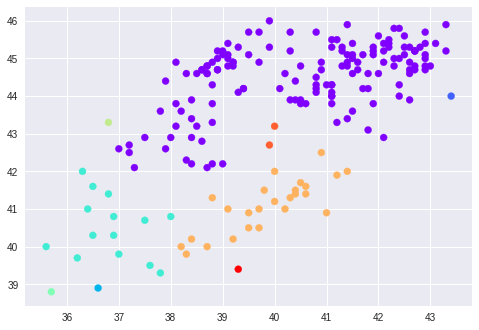

In [5]:
from mst_clustering import MSTClustering
model = MSTClustering(cutoff_scale=0.7, approximate=False)
labels = model.fit_predict(sk)
plt.scatter(sk.iloc[:, 0], sk.iloc[:, 1], c=labels, cmap='rainbow');

In [6]:
labels

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3,
       3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       5, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 7, 0, 6, 6, 0, 0, 3, 0, 0, 6, 0, 0, 0, 6, 6, 8, 6, 6, 0,
       6, 6, 0, 6, 0, 6, 6, 6, 0, 0, 7, 6, 6, 0, 6, 6, 0, 0, 6, 0, 0, 6, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0,
       0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 6], dtype=int32)

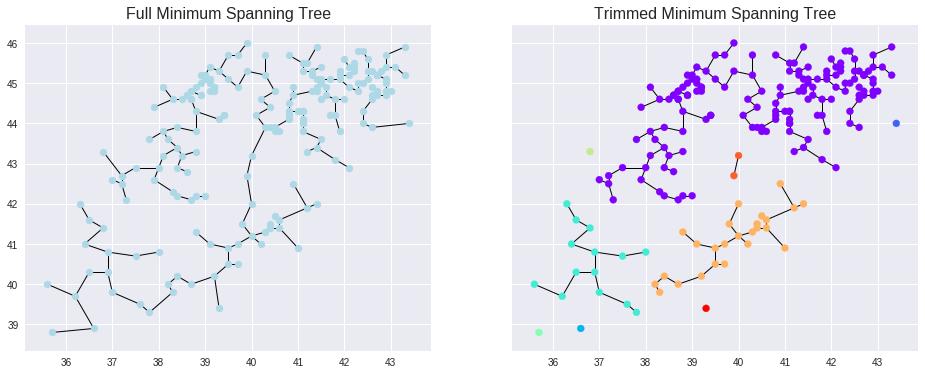

In [8]:
plot_mst(model)

### Notar que não se verifica a separação em dois clusters diagonais

In [1]:
#a seguir - testes para 4 variáveis - sem fazer transformações, nem deletar as observações zeradas)

In [13]:
sk2 = sikora_df.iloc[:,0:4] # limite superior aberto 
sk2

,Core,Lobe,B_Band,Mass
0,39.4,0.0,44.2,8.6
1,39.0,0.0,42.2,7.5
2,40.1,0.0,44.2,8.7
3,43.4,0.0,44.0,8.9
4,42.7,0.0,45.2,8.4
5,43.1,0.0,45.4,8.3
6,42.7,0.0,45.2,8.1
7,43.0,0.0,44.8,8.3
8,38.4,0.0,42.9,6.8
9,39.7,0.0,44.9,7.9


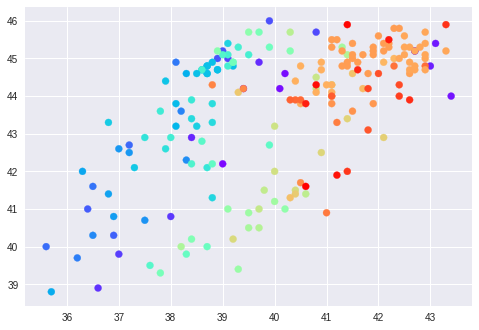

In [37]:
from mst_clustering import MSTClustering
model2 = MSTClustering(cutoff_scale=0.5, approximate=True)
labels2 = model2.fit_predict(sk2)
#plt.scatter(sk2.iloc[:, 0], sk2.iloc[:, 1], c=labels2, cmap='rainbow');
#plt.scatter(sk2.iloc[:, 0], sk2.iloc[:, 2], c=labels2, cmap='rainbow');
#plt.scatter(sk2.iloc[:, 0], sk2.iloc[:, 3], c=labels2, cmap='rainbow');
plt.scatter(sk2.iloc[:, 0], sk2.iloc[:, 2], c=labels2, cmap='rainbow');

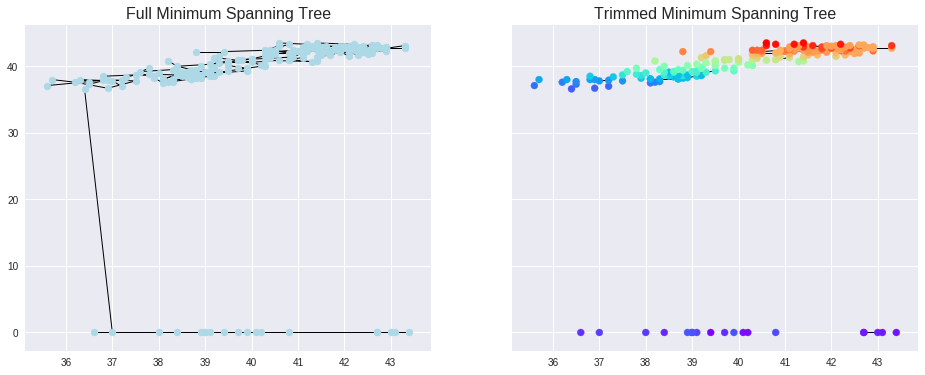

In [39]:
plot_mst(model2)

In [40]:
model2

MSTClustering(approximate=True, cutoff=None, cutoff_scale=0.5,
       metric='euclidean', metric_params=None, min_cluster_size=1,
       n_neighbors=20)